In [1]:
import numpy as np
import math
import torch
from torch.autograd import Variable
from torch import nn, optim

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation

from IPython import display

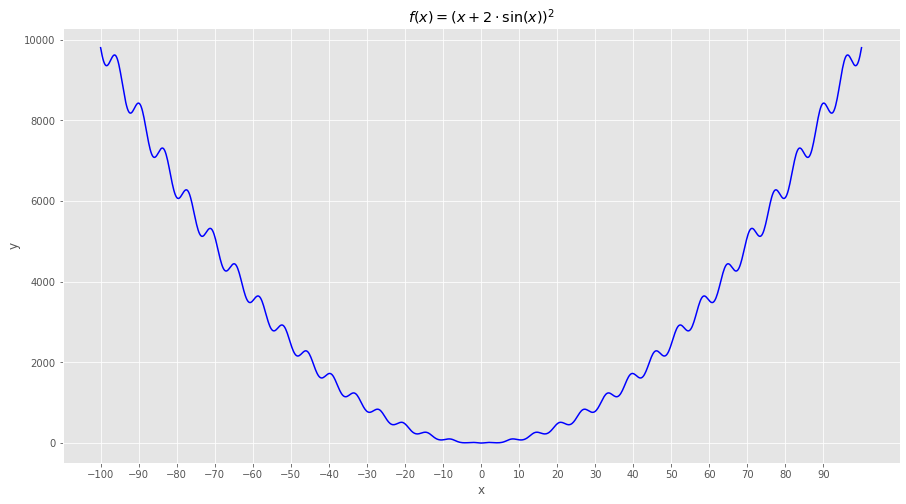

In [2]:
def f(x):
    return (x + 2 * math.sin(x))**2

x = np.linspace(-100,100,1000)
y = np.array([f(i) for i in x])

plt.figure(figsize=(15,8))

plt.plot(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')

plt.xticks(list(range(-100,100,10)))

plt.title(r'$f(x) = (x + 2 \cdot \sin(x))^{2}$')
plt.show()

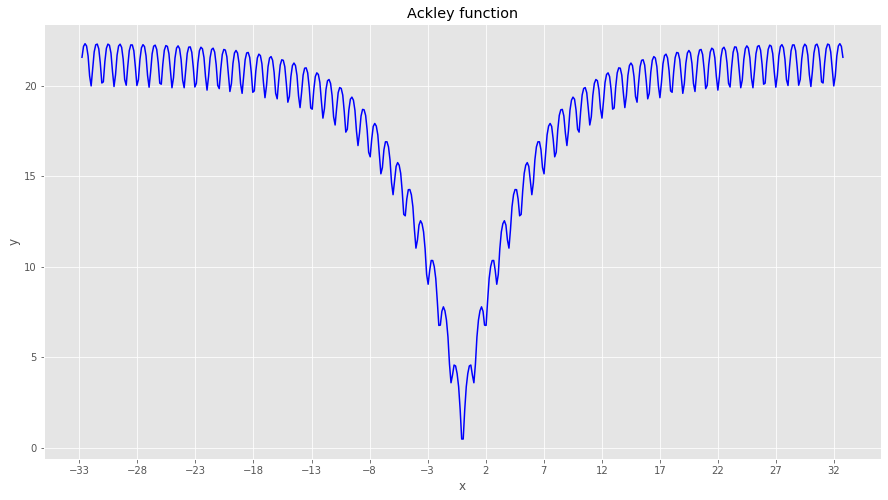

In [3]:
def f_ackley1D(x):
    a = 20
    b = 0.2
    c = 2*math.pi
    
    term1 = -a * math.exp(-b * math.sqrt(x**2))
    term2 = -math.exp(math.cos(c*x))
    
    return term1 + term2 + a + math.e

x = np.linspace(-32.768, 32.768, 500)
y = np.array([f_ackley1D(i) for i in x])

plt.figure(figsize=(15,8))

plt.plot(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')

plt.xticks(list(range(-33, 33, 5)))

plt.title('Ackley function')
plt.show()

In [4]:
# redefine to work with pytorch
def f(x):
    return (x + 2 * torch.sin(x))**2

def f_ackley1D(x):
    a = 20
    b = 0.2
    c = 2*math.pi
    
    term1 = -a * torch.exp(-b * torch.sqrt(x**2))
    term2 = -torch.exp(torch.cos(c*x))
    
    return term1 + term2 + a + math.pi

In [5]:
def optimization(x0,f,optim_method,lr=0.01,eps=0.01,plot_loss=False,return_loss=False):
    x = Variable(torch.FloatTensor([x0]), requires_grad=True)

    if optim_method=='SGD':
        optimizer = optim.SGD([x],lr=lr)
    elif optim_method=='Adam':
        optimizer = optim.Adam([x],lr=lr)
    elif optim_method=='Adadelta':
        optimizer = optim.Adadelta([x])
    elif optim_method=='Adagrad':
        optimizer = optim.Adagrad([x],lr=lr)
    elif optim_method=='RMSprop':
        optimizer = optim.RMSprop([x],lr=lr)
    
    loss_history = []
    
    while True:
        optimizer.zero_grad()
#         loss = (x + 2 * torch.sin(x))**2
        loss = f(x)
        
        loss_history.append(loss.item())
        loss.backward(retain_graph=True)
        optimizer.step()
        
        if plot_loss:
            # Visualize
            display.clear_output(wait=True)
            plt.figure(figsize=(8, 6))

            plt.title(optim_method + " Loss Curve")
            plt.xlabel("iterations")
            plt.ylabel("loss")
            plt.plot(loss_history, 'b')
            plt.show()
        
        if len(loss_history)>1 and abs(loss_history[-1] - loss_history[-2])<eps:
            print('Minimum found:',x.item())
            if return_loss:
                return loss_history
            break

In [6]:
optimizers = ['SGD','Adam','Adadelta','Adagrad','RMSprop']

results = []

for o in optimizers:
    results.append(optimization(x0=5,f=f,optim_method=o,lr=0.01,eps=0.001,plot_loss=False,return_loss=True))

Minimum found: 4.218443393707275
Minimum found: 4.25105619430542
Minimum found: 4.25803279876709
Minimum found: 4.577891826629639
Minimum found: 4.233320236206055


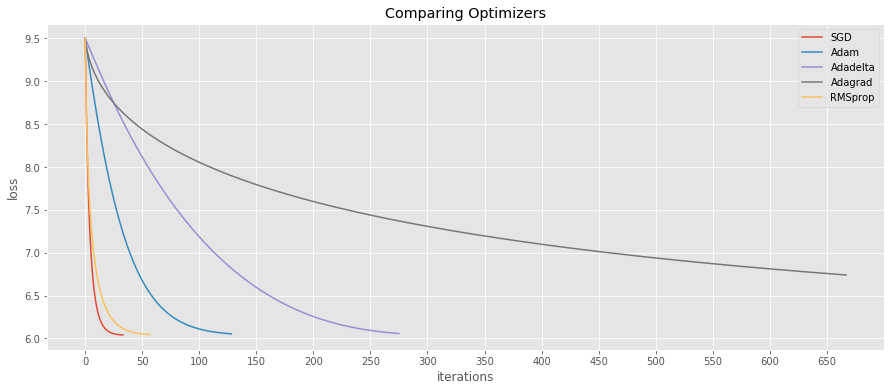

In [7]:
plt.figure(figsize=(15, 6))

plt.title("Comparing Optimizers")

plt.xlabel("iterations")
plt.ylabel("loss")

mx = 0
for each in results:
    mx = max(mx,len(each))
    plt.plot(each)

plt.xticks(list(range(0,mx,50)))

plt.legend(optimizers)
plt.show()

In [8]:
results = []

for o in optimizers:
    results.append(optimization(x0=2,f=f_ackley1D,optim_method=o,lr=0.01,eps=0.001,plot_loss=False,return_loss=True))

Minimum found: 1.9744516611099243
Minimum found: 1.9776962995529175
Minimum found: 1.9792171716690063
Minimum found: 1.9769115447998047
Minimum found: 1.9763782024383545


In [ ]:
plt.figure(figsize=(15, 6))

plt.title("Comparing Optimizers")

plt.xlabel("iterations")
plt.ylabel("loss")

mx = 0
for each in results:
    mx = max(mx,len(each))
    plt.plot(each)

# plt.xticks(list(range(0,mx,50)))

plt.legend(optimizers)
plt.show()

In [ ]:
def f_ackley2D(x1,x2):
    a = 20
    b = 0.2
    c = 2*math.pi
    
    term1 = -a * math.exp(-b * math.sqrt(0.5 * (x1**2 + x2**2)))
    term2 = -math.exp(0.5 * (math.cos(c*x1) + math.cos(c*x2)))
    
    return term1 + term2 + a + math.e 

In [ ]:
x1 = np.linspace(-32.768, 32.768, 200)
x2 = np.linspace(-32.768, 32.768, 200)
Xs, Ys = np.meshgrid(x1, x2)
Zs = np.array([f_ackley2D(x1, x2) for x1, x2 in zip(Xs.ravel(), Ys.ravel())]) 
Zs = Zs.reshape(Xs.shape)

In [ ]:
# %matplotlib qt5

# plotting
plt.figure(figsize=(15, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(Xs, Ys, Zs, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Ackley Function')
plt.show()